In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("all_home.xlsx")

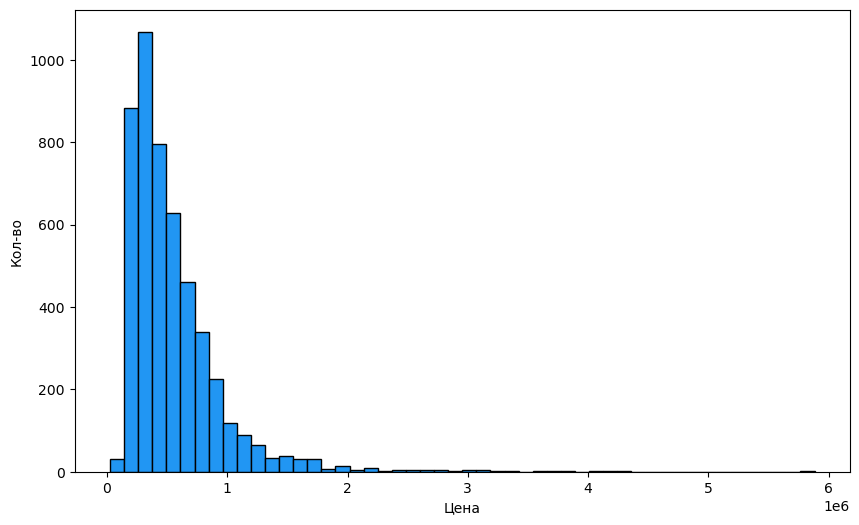

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(df['Цена'],bins=50,ec='black',color='#2196f3')
plt.xlabel('Цена')
plt.ylabel('Кол-во')
plt.show()

In [4]:
#encoder = OneHotEncoder(sparse=False, drop='first')
#encoded_columns = encoder.fit_transform(df.select_dtypes(include=['object']))

#encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out())
#df = df.drop(columns=df.select_dtypes(include=['object']).columns)
#df = pd.concat([df, encoded_df], axis=1)

In [5]:
#df = df.sample(n=len(df))
#df.to_excel("Homes_enc.xlsx",index=False)

In [6]:
df = pd.read_excel("Homes_enc.xlsx")
X = df.drop('Цена', axis=1)  # Признаки
y = df['Цена']                # Целевая переменная

# Применение стандартизации к признакам
X_scaled = scaler.fit_transform(X)

# Если нужно, объедините обратно с целевой переменной
#df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#df_scaled['Цена'] = y.values


In [7]:
#df_scaled.to_excel("Homes.xlsx",index=False)

In [8]:
df = pd.read_excel("Homes.xlsx")

In [9]:
prices = df['Цена']
features = df.drop(['Цена'],axis=1)

In [10]:
df2 = pd.read_excel("Homes_enc.xlsx")
prices2 = df2['Цена']
features2 = df2.drop(['Цена'],axis=1)

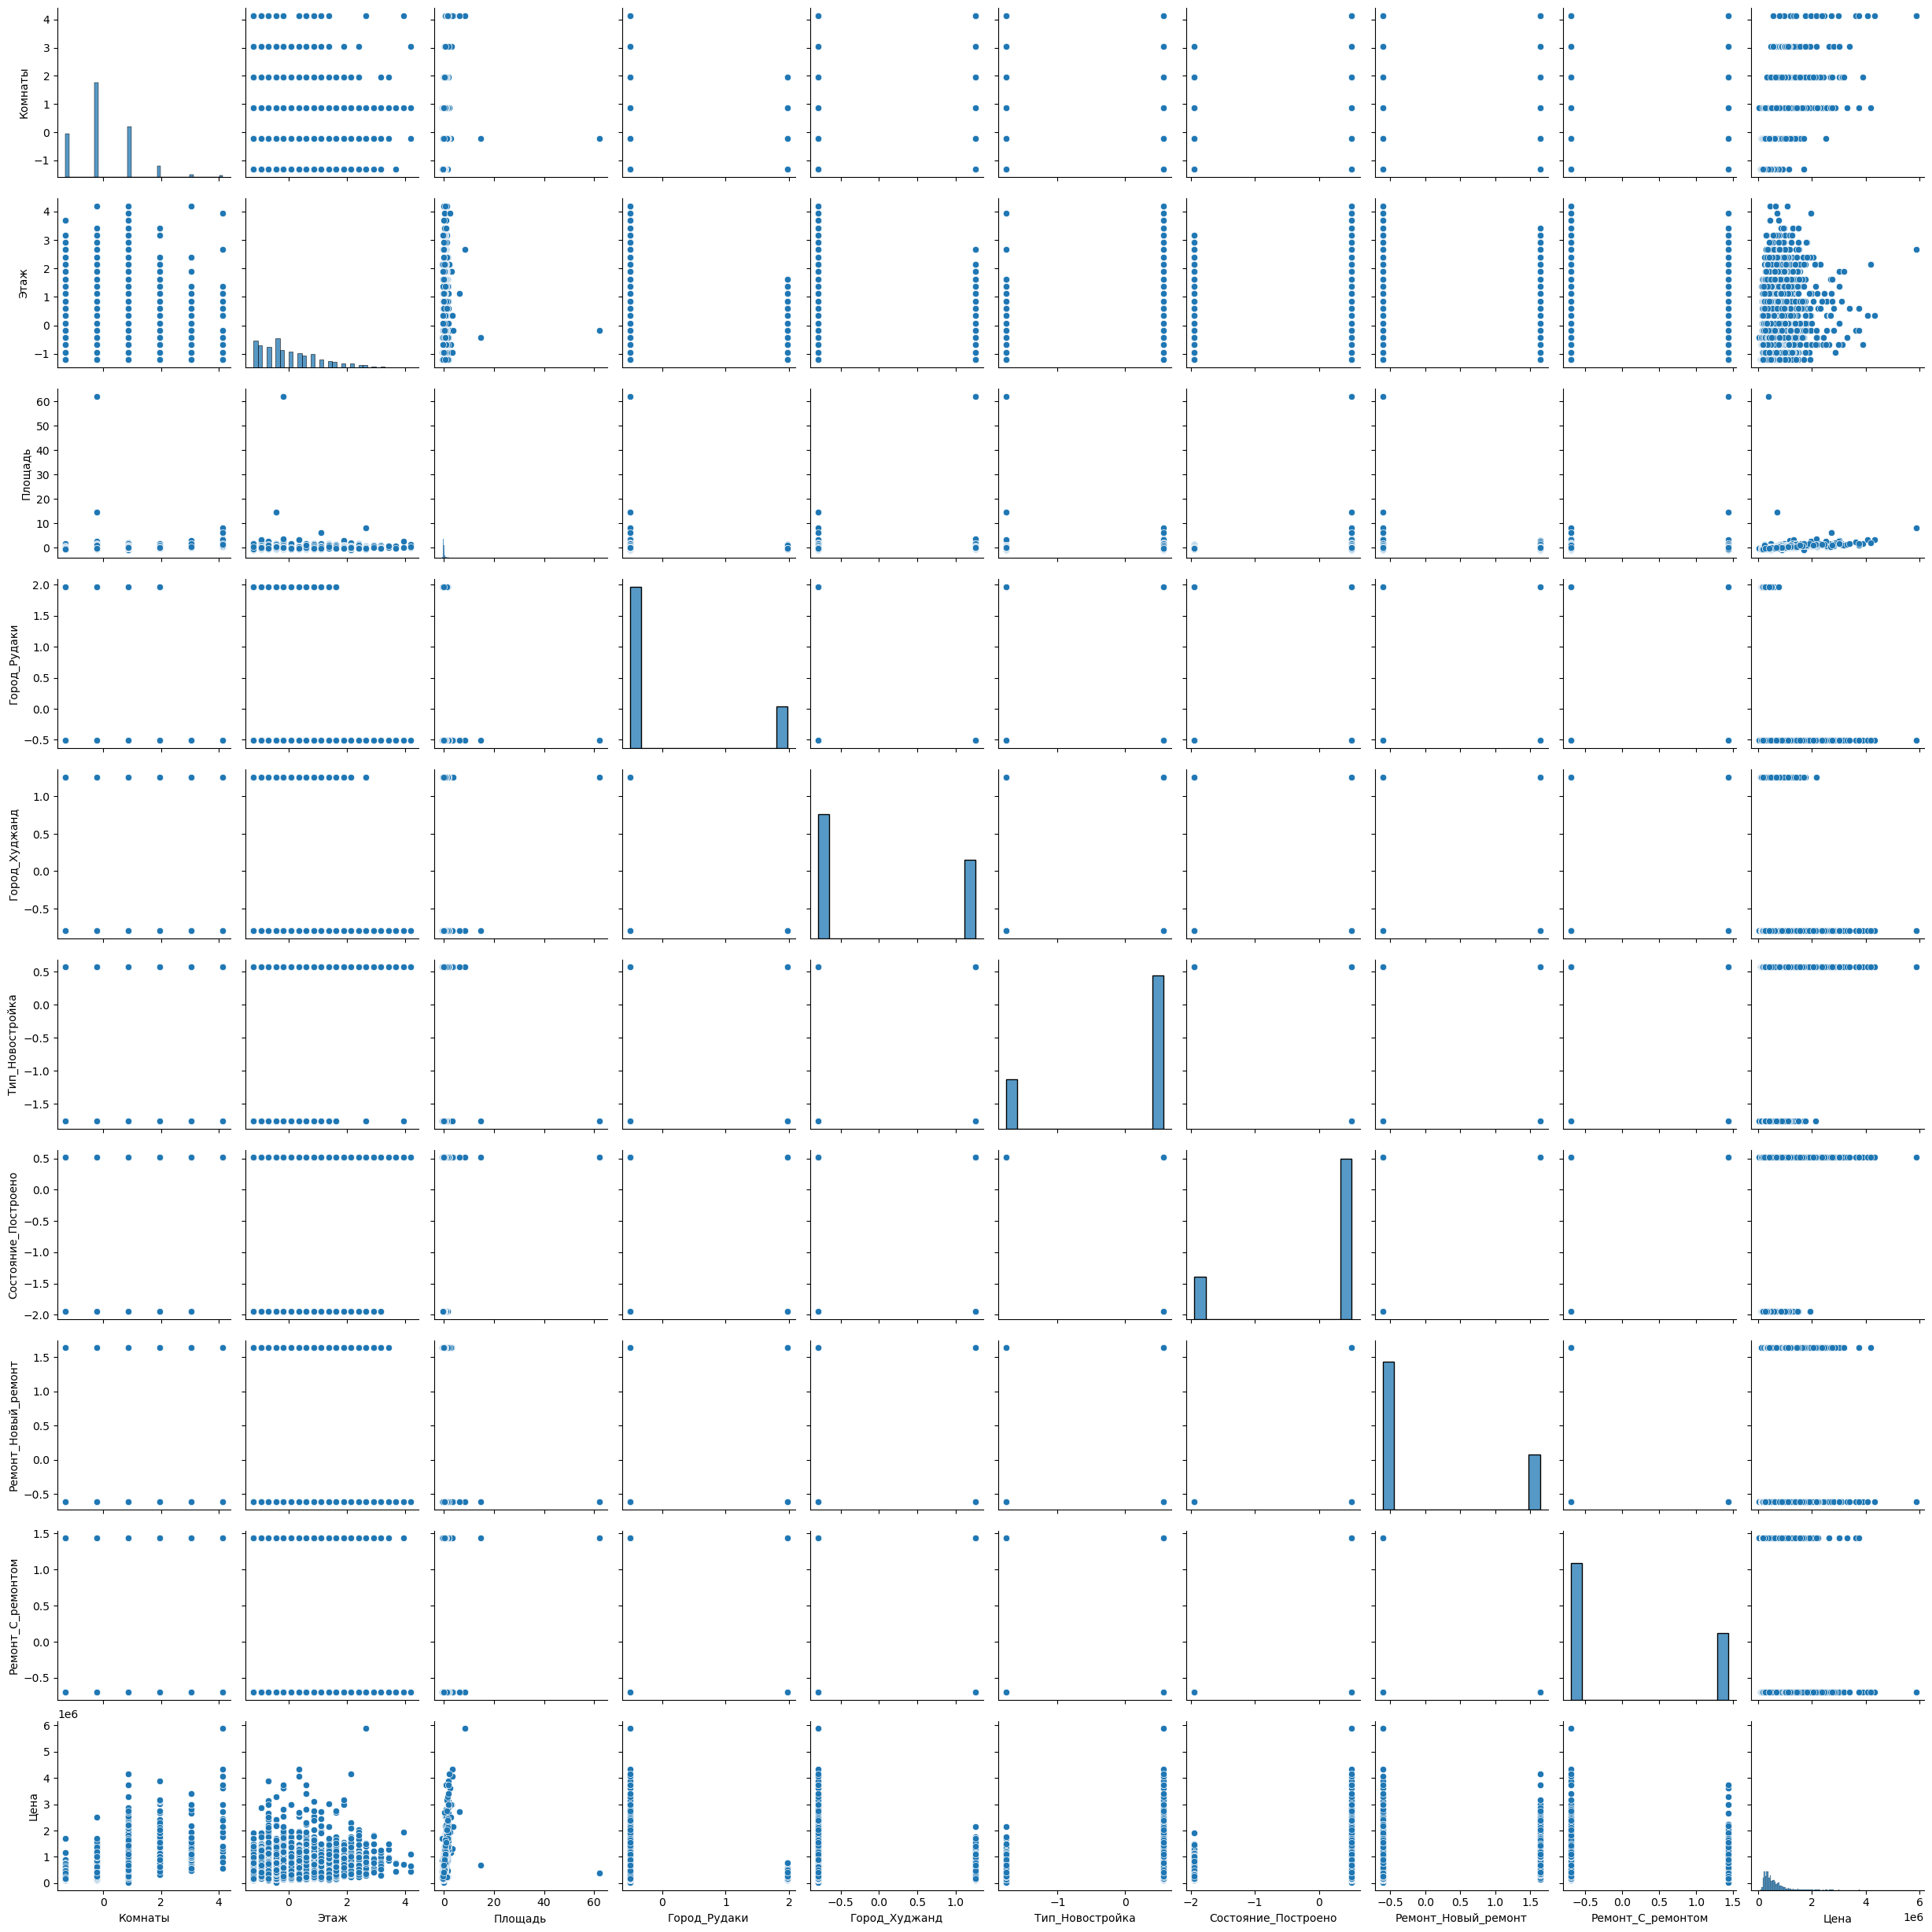

In [11]:
sns.pairplot(df)

In [12]:
#Кросс валидация CatBoost регрессии

kf = KFold(n_splits=7, shuffle=True, random_state=42)

mae_scores = []
mape_scores = []
r2_scores = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = prices.iloc[train_index], prices.iloc[test_index]
    Cat = CatBoostRegressor(verbose=0)
    Cat.fit(X_train, y_train)
    
    y_pred = Cat.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(r2)

mean_mae_Cat = np.mean(mae_scores)

mean_mape_Cat = np.mean(mape_scores)

mean_r2_Cat = np.mean(r2_scores)

In [13]:
#Кросс валидация Линейной регрессии

kf = KFold(n_splits=7, shuffle=True, random_state=42)

mae_scores = []
mape_scores = []
r2_scores = []

for train_index, test_index in kf.split(features2):
    X_train, X_test = features2.iloc[train_index], features2.iloc[test_index]
    y_train, y_test = prices2.iloc[train_index], prices2.iloc[test_index]
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(r2)

    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(r2)

mean_mae_regr = np.mean(mae_scores)

mean_mape_regr = np.mean(mape_scores)

mean_r2_regr = np.mean(r2_scores)

0.5609579991279372
0.5549059083242056
0.5866902632464787
-4.831639322037994
0.580045798500389
0.5868589718295154
0.5900323972404109


In [14]:
#Кросс валидация random forest


kf = KFold(n_splits=7, shuffle=True, random_state=42)

mae_scores = []
mape_scores = []
r2_scores = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = prices.iloc[train_index], prices.iloc[test_index]
    model2 = RandomForestRegressor(n_estimators=300, random_state=42)
    model2.fit(X_train, y_train)
    
    y_pred = model2.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(r2)

mean_mae_forest = np.mean(mae_scores)

mean_mape_forest = np.mean(mape_scores)

mean_r2_forest = np.mean(r2_scores)

In [15]:
#Кросс валидация Дерево решений


kf = KFold(n_splits=7, shuffle=True, random_state=42)

mae_scores = []
mape_scores = []
r2_scores = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = prices.iloc[train_index], prices.iloc[test_index]
    tree = DecisionTreeRegressor(max_depth=15,random_state=1)
    tree.fit(X_train, y_train)
    
    y_pred = tree.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(r2)

mean_mae_tree = np.mean(mae_scores)

mean_mape_tree = np.mean(mape_scores)

mean_r2_tree = np.mean(r2_scores)

In [16]:
#Кросс валидация KNN


kf = KFold(n_splits=7, shuffle=True, random_state=42)

mae_scores = []
mape_scores = []
r2_scores = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = prices.iloc[train_index], prices.iloc[test_index]
    knn = KNeighborsRegressor(n_neighbors=7)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(r2)

mean_mae_knn = np.mean(mae_scores)

mean_mape_knn = np.mean(mape_scores)

mean_r2_knn = np.mean(r2_scores)

In [17]:
df_char = pd.DataFrame({'Model':['Linear_regr','Random-forest', 'Дерево-решений','KNN','Cat'],
                       'R^2':[mean_r2_regr, mean_r2_forest, mean_r2_tree,mean_r2_knn,mean_r2_Cat],
                        'Mae':[mean_mae_regr, mean_mae_forest, mean_mae_tree,mean_mae_knn,mean_mae_Cat],
                        'Mape':[mean_mape_regr, mean_mape_forest, mean_mape_tree,mean_mape_knn,mean_mape_Cat]})

In [18]:
df_char

,Model,R^2,Mae,Mape
0,Linear_regr,-0.196021,155375.492702,0.329338
1,Random-forest,0.821015,80456.904843,0.140442
2,Дерево-решений,0.713561,94481.410229,0.158735
3,KNN,0.780597,98437.557494,0.176715
4,Cat,0.829714,85220.857918,0.158787


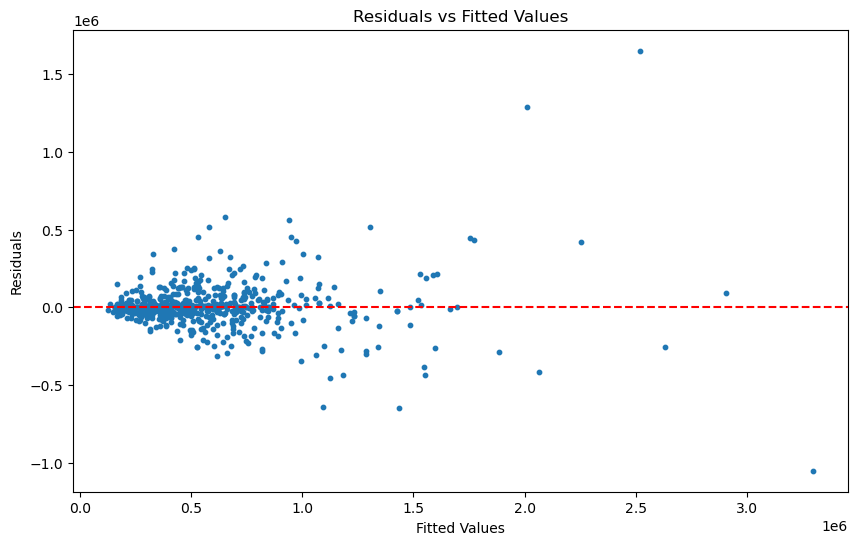

In [19]:
fitted_values = model2.predict(X_test)

# Остатки
residuals = y_test - fitted_values

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [20]:
data = {
    'actual': prices,
    'predicted': model2.predict(features)
}
df_data = pd.DataFrame(data)
df_data['residuals'] = df_data['actual'] - df_data['predicted']
threshold = 200000
large_residuals_indices = df_data[abs(df_data['residuals']) > threshold].index.tolist()
print(f"Количество точек с остатками больше {threshold} : {len(large_residuals_indices)}")

Количество точек с остатками больше 200000 : 148


In [21]:
#df2 = df.copy()

In [22]:
#df2 = df2.drop(index=large_residuals_indices)

In [23]:
#df2 = df2.sample(len(df2))

In [24]:
#df2.to_excel("Best_vrs_forest.xlsx",index=False)

In [25]:
df2 = pd.read_excel("Best_vrs_forest.xlsx")

In [26]:
prices_fr_test = df2['Цена']
features_fr_test = df2.drop(['Цена'],axis=1)

In [27]:
#Кросс валидация improved random forest


kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
mape_scores = []
r2_scores = []

for train_index, test_index in kf.split(features_fr_test):
    X_train, X_test = features_fr_test.iloc[train_index], features_fr_test.iloc[test_index]
    y_train, y_test = prices_fr_test.iloc[train_index], prices_fr_test.iloc[test_index]
    model_test = RandomForestRegressor(n_estimators=100, random_state=42)
    model_test.fit(X_train, y_train)
    
    y_pred = model_test.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(r2)

mean_mae_forest_test = np.mean(mae_scores)

mean_mape_forest_test = np.mean(mape_scores)

mean_r2_forest_test = np.mean(r2_scores)

In [28]:
df_fr_char = pd.DataFrame({"Model":["improved model"],
                          "R^2":[mean_r2_forest_test],
                          "Mae":[mean_mae_forest_test],
                          "Mape":[mean_mape_forest_test]})

In [29]:
data = {
    'actual': prices_fr_test,
    'predicted': model_test.predict(features_fr_test)
}
df_data = pd.DataFrame(data)
df_data['residuals'] = df_data['actual'] - df_data['predicted']
threshold = 200000
large_residuals_indices = df_data[abs(df_data['residuals']) > threshold].index.tolist()
print(f"Количество точек с остатками больше {threshold} : {len(large_residuals_indices)}")

Количество точек с остатками больше 200000 : 82


In [30]:
X_train, X_test, y_train, y_test = train_test_split(features_fr_test,prices_fr_test,
                                                    test_size=0.25, random_state=42)

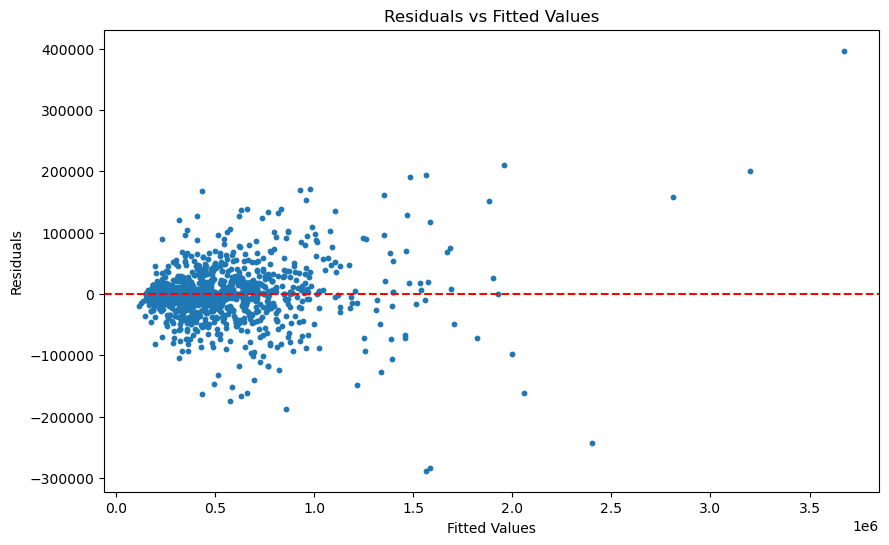

In [31]:
fitted_values = model_test.predict(X_test)

# Остатки
residuals = y_test - fitted_values

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [32]:
df_char

,Model,R^2,Mae,Mape
0,Linear_regr,-0.196021,155375.492702,0.329338
1,Random-forest,0.821015,80456.904843,0.140442
2,Дерево-решений,0.713561,94481.410229,0.158735
3,KNN,0.780597,98437.557494,0.176715
4,Cat,0.829714,85220.857918,0.158787


In [33]:
df_fr_char

,Model,R^2,Mae,Mape
0,improved model,0.898115,62709.220273,0.12056


maelist = []
mapelist = []
r2list = []
for j in range(4,12):
    for i in range(200,400,30):
        model = RandomForestRegressor(n_estimators=i, max_depth=j, random_state=42)
        kf = KFold(n_splits=7, shuffle=True, random_state=42)
        mae_scores = []
        mape_scores = []
        r2_scores = []
        for train_index, test_index in kf.split(features_fr_test):
            X_train, X_test = features_fr_test.iloc[train_index], features_fr_test.iloc[test_index]
            y_train, y_test = prices_fr_test.iloc[train_index], prices_fr_test.iloc[test_index]
            model.fit(X_train, y_train)
    
            y_pred = model.predict(X_test)

            mae = mean_absolute_error(y_test, y_pred)
            mape = mean_absolute_percentage_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            mae_scores.append(mae)
            mape_scores.append(mape)
            r2_scores.append(r2)

        maelist.append(np.mean(mae_scores))
        mapelist.append(np.mean(mape_scores))
        r2list.append(np.mean(r2_scores))

maelist

r2list

mapelist

## Наилучшее кол-во деревьев это 400, и глубина дерева 14

In [34]:
#Кросс валидация impr random forest


kf = KFold(n_splits=7, shuffle=True, random_state=42)

mae_scores_im_fr = []
mape_scores_im_fr = []
r2_scores_im_fr = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = prices.iloc[train_index], prices.iloc[test_index]
    model = RandomForestRegressor(n_estimators=400, max_depth=14, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores_im_fr.append(mae)
    mape_scores_im_fr.append(mape)
    r2_scores_im_fr.append(r2)

mean_mae_im = np.mean(mae_scores_im_fr)

mean_mape_im = np.mean(mape_scores_im_fr)

mean_r2_im = np.mean(r2_scores_im_fr)

In [35]:
df_im_ch = pd.DataFrame({
    "Model":["hyper_model"],
    "R^2":[mean_r2_im],
    "Mae":[mean_mae_im],
    "Mape":[mean_mape_im]
})

In [36]:
df_im_ch

,Model,R^2,Mae,Mape
0,hyper_model,0.82256,79978.001126,0.140165


In [37]:
data = {
    'actual': prices,
    'predicted': model.predict(features)
}
df_data = pd.DataFrame(data)
df_data['residuals'] = df_data['actual'] - df_data['predicted']
threshold = 200000
large_residuals_indices = df_data[abs(df_data['residuals']) > threshold].index.tolist()
print(f"Количество точек с остатками больше {threshold} : {len(large_residuals_indices)}")

Количество точек с остатками больше 200000 : 163


In [38]:
#df2 = df.copy()
#df2 = df2.drop(index=large_residuals_indices)
#df2 = df2.sample(len(df2))
#df2.to_excel("Best_forest.xlsx",index=False)

In [39]:
df = pd.read_excel("Best_forest.xlsx")
prices = df['Цена']
features = df.drop(['Цена'],axis=1)

In [40]:
#Кросс валидация impr random forest


kf = KFold(n_splits=7, shuffle=True, random_state=42)

mae_scores_im_fr = []
mape_scores_im_fr = []
r2_scores_im_fr = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = prices.iloc[train_index], prices.iloc[test_index]
    model = RandomForestRegressor(n_estimators=400, max_depth=14, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores_im_fr.append(mae)
    mape_scores_im_fr.append(mape)
    r2_scores_im_fr.append(r2)

mean_mae_im_fr = np.mean(mae_scores_im_fr)

mean_mape_im_fr = np.mean(mape_scores_im_fr)

mean_r2_im_fr = np.mean(r2_scores_im_fr)

In [41]:
df_3 = pd.DataFrame({
    "Model":["finally model"],
    "R^2":[mean_r2_im_fr],
    "Mae":[mean_mae_im_fr],
    "Mape":[mean_mape_im_fr]
})

In [42]:
df_3

,Model,R^2,Mae,Mape
0,finally model,0.90357,61208.4304,0.118176


In [43]:
df_fnl = pd.concat([df_char,df_fr_char,df_im_ch,df_3])
df_fnl

,Model,R^2,Mae,Mape
0,Linear_regr,-0.196021,155375.492702,0.329338
1,Random-forest,0.821015,80456.904843,0.140442
2,Дерево-решений,0.713561,94481.410229,0.158735
3,KNN,0.780597,98437.557494,0.176715
4,Cat,0.829714,85220.857918,0.158787
0,improved model,0.898115,62709.220273,0.120560
0,hyper_model,0.822560,79978.001126,0.140165
0,finally model,0.903570,61208.430400,0.118176


In [44]:
X_train, X_test, y_train, y_test = train_test_split(features,prices,
                                                    test_size=0.25, random_state=42)
model = RandomForestRegressor(n_estimators=400, max_depth=14, random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=14, n_estimators=400, random_state=42)

In [45]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9798204307876515
0.8973441064914611


In [46]:
import pickle

with open("model.pkl", 'wb') as f:
    pickle.dump(model, f)

In [47]:
with open("model.pkl", 'rb') as f:
    clf = pickle.load(f)

In [47]:
df_prog = pd.DataFrame({
    "Комнаты":[3],
    "Этаж":[1],
    "Площадь":[100],
    "Город_Рудаки":[0],
    "Город_Худжанд":[0],
    "Тип_Новостройка":[1],
    "Состояние_Построено":[1],
    "Ремонт_Новый_ремонт":[0],
    "Ремонт_С_ремонтом":[1]
})
df_sc = scaler.transform(df_prog)
print(f"Цена находится в диапозоне от {round(model.predict(df_sc)[0]*0.88,0)} до {round(model.predict(df_sc)[0]*1.12,0)}")

Цена находится в диапозоне от 1010372.0 до 1285928.0
